In [57]:
from random import randint
from Inertia import normal, metropolis, test, arange
import matplotlib.pyplot as plt
from math import gamma, exp, pi, log
from math import sqrt
plt.style.use("ggplot")

In [2]:
x0 = 4
p = metropolis(test,x0, n=100000, burn_in=1000, thin=5, m=10)

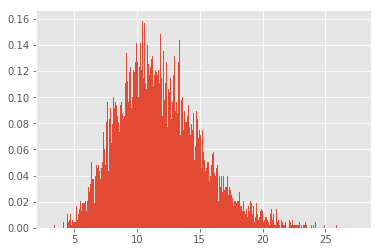

In [3]:
plt.hist(p, bins=1000, density=True)
plt.show()

In [122]:
n = 8
beta = [-1, 100]
X = [randint(1,100) for _ in range(n)]
y = [beta[0]*i+beta[1]+normal(1, mu=0, sigma=sqrt(i)) for i in X]

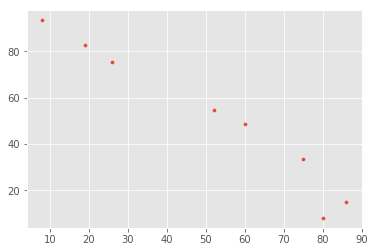

In [125]:
plt.scatter(X, y, s=10)
plt.show()

In [126]:
def test2(p, x, y):
    beta = [p[0], p[1]]
    
    mu = [5, 10]
    sigma = [5, 10]
    
    term1 = log(exp(-(beta[0] - mu[0])**2/(2*sigma[0]**2))/(sqrt(2*pi)*sigma[0]))
    term2 = log(exp(-(beta[1] - mu[1])**2/(2*sigma[1]**2))/(sqrt(2*pi)*sigma[1]))
    
    diff = [y[i] - (beta[0]*x[i]+beta[1]) for i in range(len(x))]
    #term4 = [exp(-diff[i]**2/(2*x[i]**(2/n)))/(sqrt(2*pi)*x[i]**(1/n)) for i in range(len(x))]
    term3 = [-diff[i]**2/(2*x[i])-(1/2)*log(x[i]) for i in range(len(x))]
    term3 = sum(term3)
    
    logp = term1+term2+term3
    
    return logp

In [127]:
p = metropolis(test2, x0=[1,10], n=100000, burn_in=1000, thin=5, x=X, y=y)

In [128]:
b0 = [x for x,y in p]
b1 = [y for x,y in p]

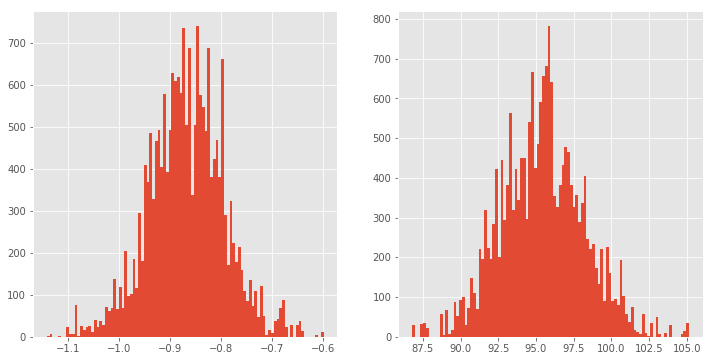

In [129]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(b0, bins=100)
plt.subplot(122)
plt.hist(b1, bins=100)
plt.show()

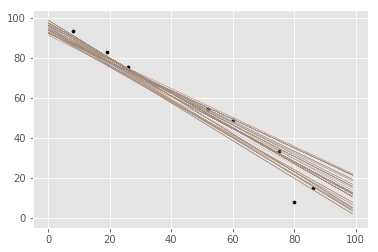

In [132]:
X2 = arange(0,100)
for i in range(0, 300):
    y2 = [p[i][0]*x+p[i][1] for x in X2]
    plt.plot(X2, y2, lw=0.1)
plt.scatter(X, y, s=10, c='black')
plt.show()